In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, minimize

In [122]:
file1 = "/Users/goloshch/PycharmProjects/Sandbox/Resonator/data/test_gauss_fit/4.jpg"
im1 = plt.imread(file1)
im1 = im1[:-15,:-10].mean(axis=2)
step = 1

In [123]:
shape = im1.shape
shape

(705, 710)

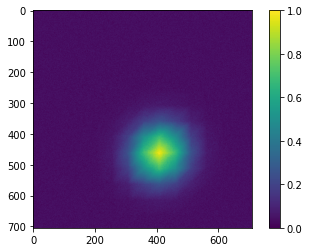

In [124]:
err = np.round(np.random.random(shape)*20)
image = im1 + err
plt.imshow(image/image.max())
plt.colorbar()

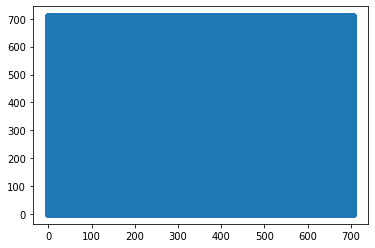

In [125]:
x = np.arange(0, shape[0])
y = np.arange(0, shape[1])
xv, yv = np.meshgrid(x, y)
plt.scatter(xv, yv)

In [130]:
def gauss(x, y, x0, y0, sigma_x, sigma_y):
    return np.exp(-(x-x0)**2/(2*sigma_x**2)-(y-y0)**2/(2*sigma_y**2))

def cost_func(params, image):
    x0, y0, sigma_x, sigma_y = params
    xlen, ylen = image.shape
    x, y = np.arange(xlen), np.arange(ylen)
    xv, yv = np.meshgrid(x, y)
    return np.linalg.norm(image/image.max() - gauss(xv, yv, x0, y0, sigma_x, sigma_y).T)

def display_params(params):
    x0, y0, sigma_x, sigma_y = params
    print("x0       = {}".format(x0))
    print("y0       = {}".format(y0))
    print("sigma_x0 = {}".format(sigma_x))
    print("sigma_y0 = {}".format(sigma_y))


res = minimize(cost_func, args=(image), x0=[500, 450, 50, 50])

x0       = 461.04867772483897
y0       = 409.7602273649243
sigma_x0 = 62.952882822113295
sigma_y0 = 62.95140222468533

Ошибка при апроксимации гауссом                   :  31.004090885292364
Ошибка при апроксимации плоскостью с значением 0.5:  340.29496577432707


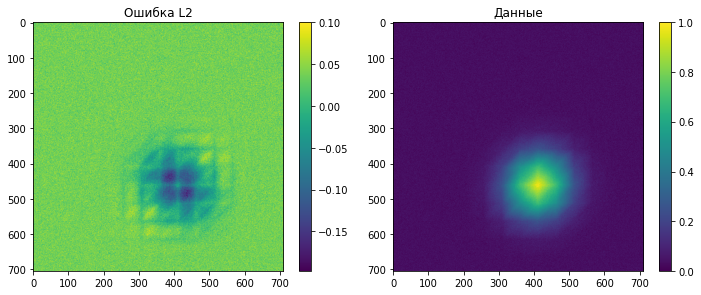

In [131]:
display_params(res.x)
xlen, ylen = image.shape
x, y = np.arange(xlen), np.arange(ylen)
xv, yv = np.meshgrid(x, y)

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.imshow(image/image.max() - gauss(xv, yv, *res.x).T)
plt.title("Ошибка L2")
plt.colorbar()

plt.subplot(122)
plt.imshow(image/image.max())
plt.title("Данные")
plt.colorbar()

plt.tight_layout()
print()
print("Ошибка при апроксимации гауссом                   : ", cost_func(res.x, image))
print("Ошибка при апроксимации плоскостью с значением 0.5: ", cost_func(res.x, np.ones(shape=image.shape))/2)

In [132]:
def gauss(x, y, A, x0, y0, sigma_x, sigma_y):
    return A*np.exp(-(x-x0)**2/(2*sigma_x**2)-(y-y0)**2/(2*sigma_y**2))

def cost_func(params, image):
    A, x0, y0, sigma_x, sigma_y = params
    xlen, ylen = image.shape
    x, y = np.arange(xlen), np.arange(ylen)
    xv, yv = np.meshgrid(x, y)
    return np.linalg.norm(image/image.max() - gauss(xv, yv, A, x0, y0, sigma_x, sigma_y).T)

def display_params(params):
    A, x0, y0, sigma_x, sigma_y = params
    print("A        = {}".format(A))
    print("x0       = {}".format(x0))
    print("y0       = {}".format(y0))
    print("sigma_x0 = {}".format(sigma_x))
    print("sigma_y0 = {}".format(sigma_y))


res = minimize(cost_func, args=(image), x0=[1.0, 500, 450, 50, 50])

A        = 0.835537145407022
x0       = 461.04261209169084
y0       = 409.7556703032939
sigma_x0 = 69.72315576154364
sigma_y0 = 69.75403717155956

Ошибка при апроксимации гауссом                   :  28.1602484360749
Ошибка при апроксимации плоскостью с значением 0.5:  339.1771243147908


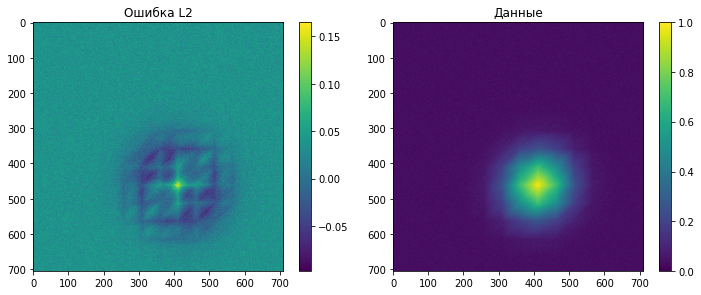

In [133]:
display_params(res.x)
xlen, ylen = image.shape
x, y = np.arange(xlen), np.arange(ylen)
xv, yv = np.meshgrid(x, y)

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.imshow(image/image.max() - gauss(xv, yv, *res.x).T)
plt.title("Ошибка L2")
plt.colorbar()

plt.subplot(122)
plt.imshow(image/image.max())
plt.title("Данные")
plt.colorbar()

plt.tight_layout()
print()
print("Ошибка при апроксимации гауссом                   : ", cost_func(res.x, image))
print("Ошибка при апроксимации плоскостью с значением 0.5: ", cost_func(res.x, np.ones(shape=image.shape))/2)